# Data Tagging

This notebook shows how to use tagging when acquiring data in order to create datasets.

Tags are used to manually annotate sensor data during the acquisition.

It is possible to customize labels used for data tagging.

A single datalog acquisition may contain several time intervals that are associated with different tags: we then need to cut&paste homogeneous segments in order to create datasets for each class of interest.

## Importing a tagged acquisition and showing labels

In [1]:
import warnings
warnings.filterwarnings("ignore")
from HSD.HSDatalog import HSDatalog
import os

acq = "20220425_17_14_41"
acq_folder = os.path.join(os.getcwd(),"datalogs",acq)
hsd = HSDatalog(acq_folder)
label_list = hsd.get_acquisition_label_classes() # let's print the labels used in this acquisition
print(label_list)

['fast', 'slow']


NOTE: ```hsd.get_sensor_plot()``` does not seem to work when there is only one interval for each tag.

## Plotting fast and slow data

True

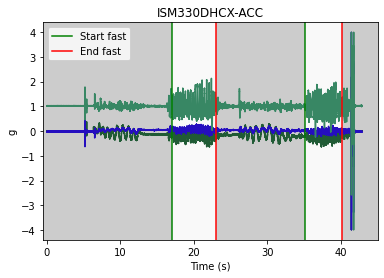

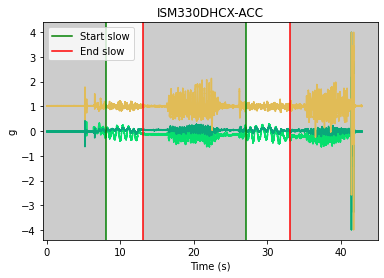

In [2]:
sensor_name = "ISM330DHCX"
sensor_type = "ACC"
hsd.get_sensor_plot(sensor_name, sensor_type, label='fast')
hsd.get_sensor_plot(sensor_name, sensor_type, label='slow')

The time intervals {start, end} for each tag can be obtained by calling the following functions.

In [3]:
hsd.get_time_tags()

[{'Label': 'fast', 'time_start': 17.04108216, 'time_end': 23.04992266},
 {'Label': 'fast', 'time_start': 35.06811941, 'time_end': 40.07735998},
 {'Label': 'slow', 'time_start': 8.017914592, 'time_end': 13.03025484},
 {'Label': 'slow', 'time_start': 27.05513507, 'time_end': 33.06453541}]

In [4]:
hsd.get_data_stream_tags(sensor_name,sensor_type,0,-1)

[{'Label': 'fast',
  'time_start': 17.04108216,
  'time_end': 23.04992266,
  'sample_start': 119121,
  'sample_end': 161223},
 {'Label': 'fast',
  'time_start': 35.06811941,
  'time_end': 40.07735998,
  'sample_start': 245437,
  'sample_end': 280534},
 {'Label': 'slow',
  'time_start': 8.017914592,
  'time_end': 13.03025484,
  'sample_start': 55893,
  'sample_end': 91016},
 {'Label': 'slow',
  'time_start': 27.05513507,
  'time_end': 33.06453541,
  'sample_start': 189290,
  'sample_end': 231397}]

## Separating slow and fast data
We want to separate slow and fast data. Let's start by creating a pandas dataframe; please note that we pass ```labeled = True``` as a parameter, so that the resulting dataframe includes one column for each label.

In [15]:

df = hsd.get_dataframe(sensor_name,sensor_type, sample_start=0, sample_end=-1, labeled = True)
df

,Time,A_x [g],A_y [g],A_z [g],fast,slow
0,0.041832,-0.010370,-0.021350,1.022970,False,False
1,0.041975,-0.007930,-0.018300,1.020896,False,False
2,0.042117,-0.009638,-0.017690,1.022238,False,False
3,0.042260,-0.012200,-0.016592,1.023458,False,False
4,0.042403,-0.014518,-0.025132,1.021994,False,False
...,...,...,...,...,...,...
299995,42.854925,-0.011590,-0.017324,1.016260,False,False
299996,42.855068,-0.007808,-0.017080,1.017358,False,False
299997,42.855211,-0.002440,-0.018788,1.020896,False,False
299998,42.855353,-0.011712,-0.021228,1.016870,False,False


At this point, we can use pandas queries to create a new dataframe with only slow data, as shown below.

In [16]:
slow = df[df.slow == True]
slow

,Time,A_x [g],A_y [g],A_z [g],fast,slow
55893,8.018017,-0.249856,-0.003904,1.032120,False,True
55894,8.018159,-0.249368,0.004514,1.029192,False,True
55895,8.018302,-0.256444,0.010004,1.023092,False,True
55896,8.018445,-0.250344,0.005734,1.026386,False,True
55897,8.018587,-0.254858,0.006466,1.030290,False,True
...,...,...,...,...,...,...
231392,33.063779,-0.368562,-0.027694,1.094584,False,True
231393,33.063922,-0.371856,-0.032208,1.098244,False,True
231394,33.064064,-0.377468,-0.030866,1.098244,False,True
231395,33.064207,-0.372100,-0.035990,1.099830,False,True
